# 1. Standard Scaling

In [12]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

In [13]:
# make an example dataset
df = {
    'age' : [25,30, 35, 40, 45, 50, 55],
    'height' : [165,170,175,180,185, 190,195],
    'weight' : [55,60,65,70,75,80,85]
}

# convert this data to pandas dataframe
df = pd.DataFrame(df)
df.head()

,age,height,weight
0,25,165,55
1,30,170,60
2,35,175,65
3,40,180,70
4,45,185,75


In [17]:
# import the scalar
scalar = StandardScaler()

# fit the scalar on data
scaled_df = scalar.fit_transform(df)
scaled_df

array([[-1.5, -1.5, -1.5],
       [-1. , -1. , -1. ],
       [-0.5, -0.5, -0.5],
       [ 0. ,  0. ,  0. ],
       [ 0.5,  0.5,  0.5],
       [ 1. ,  1. ,  1. ],
       [ 1.5,  1.5,  1.5]])

In [18]:
# convert this data into a pandas dataframe
scaled_df = pd.DataFrame(scaled_df, columns = df.columns)
scaled_df.head()

,age,height,weight
0,-1.5,-1.5,-1.5
1,-1.0,-1.0,-1.0
2,-0.5,-0.5,-0.5
3,0.0,0.0,0.0
4,0.5,0.5,0.5


# Min Max Scalar

In [20]:
# import the scalar
scalar = MinMaxScaler()

# fit the scalar on data
scaled_df = scalar.fit_transform(df)
scaled_df
# convert this data into a pandas dataframe
scaled_df = pd.DataFrame(scaled_df, columns = df.columns)
scaled_df.head(7)

,age,height,weight
0,0.000000,0.000000,0.000000
1,0.166667,0.166667,0.166667
2,0.333333,0.333333,0.333333
3,0.500000,0.500000,0.500000
4,0.666667,0.666667,0.666667
5,0.833333,0.833333,0.833333
6,1.000000,1.000000,1.000000


# Max Abs Scalar

In [22]:
# import the scalar
scalar = MaxAbsScaler()

# fit the scalar on data
scaled_df = scalar.fit_transform(df)
scaled_df
# convert this data into a pandas dataframe
scaled_df = pd.DataFrame(scaled_df, columns = df.columns)
scaled_df.head(7)

,age,height,weight
0,0.454545,0.846154,0.647059
1,0.545455,0.871795,0.705882
2,0.636364,0.897436,0.764706
3,0.727273,0.923077,0.823529
4,0.818182,0.948718,0.882353
5,0.909091,0.974359,0.941176
6,1.000000,1.000000,1.000000


# Robust Scalar

In [24]:
from sklearn.preprocessing import RobustScaler
# import the scalar
scalar = RobustScaler()

# fit the scalar on data
scaled_df = scalar.fit_transform(df)
scaled_df
# convert this data into a pandas dataframe
scaled_df = pd.DataFrame(scaled_df, columns = df.columns)
scaled_df.head(7)

,age,height,weight
0,-1.000000,-1.000000,-1.000000
1,-0.666667,-0.666667,-0.666667
2,-0.333333,-0.333333,-0.333333
3,0.000000,0.000000,0.000000
4,0.333333,0.333333,0.333333
5,0.666667,0.666667,0.666667
6,1.000000,1.000000,1.000000


# Transformation

In [25]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
# Generate non-normal data (Exponential Distribution)
np.random.seed(0)
df = np.random.exponential(size=1000, scale=2)
df = pd.DataFrame(df, columns=['values'])
df.head()

,values
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097


In [27]:
df.shape

(1000, 1)

<Axes: xlabel='values', ylabel='Count'>

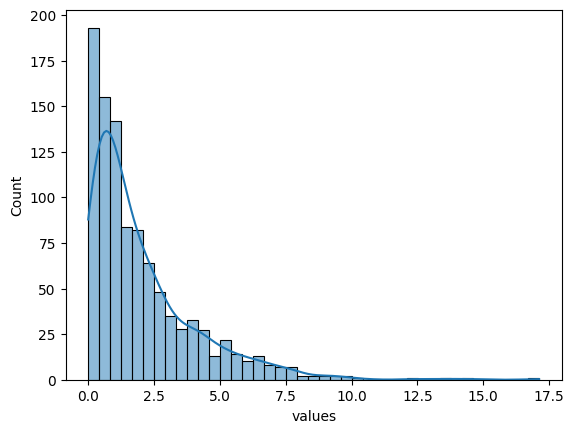

In [28]:
sns.histplot(df['values'] , kde=True)

In [29]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

pt_boxcox = PowerTransformer(method='box-cox')
pt_yeo_johnson = PowerTransformer(method='yeo-johnson')
qt_normal = QuantileTransformer(output_distribution='normal')

# boxxox ke liye data must be positive
df['Box_Cox'] = pt_boxcox.fit_transform(df[['values']]+ 1)
df['Yeo_Johnson'] = pt_yeo_johnson.fit_transform(df[['values']])
df['Quantile'] = qt_normal.fit_transform(df[['values']])

In [30]:
df.head()

,values,Box_Cox,Yeo_Johnson,Quantile
0,1.591749,0.179335,0.179335,0.162552
1,2.511862,0.677331,0.677331,0.587964
2,1.846446,0.339698,0.339698,0.286135
3,1.574402,0.167607,0.167607,0.157469
4,1.102097,-0.202107,-0.202107,-0.154930


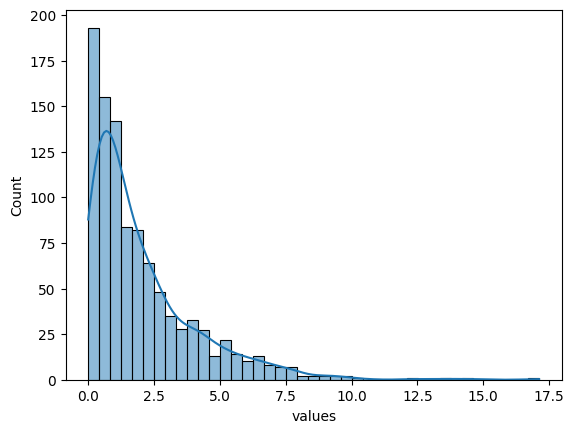

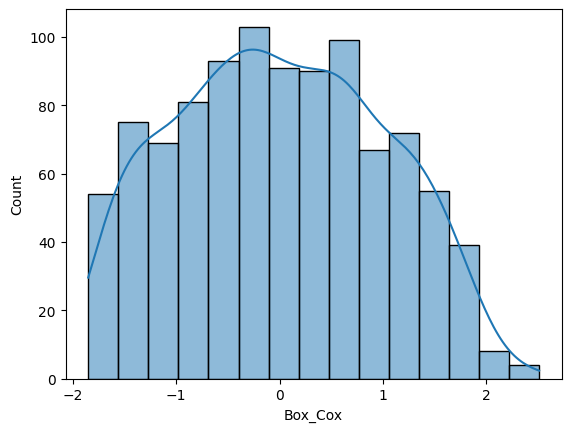

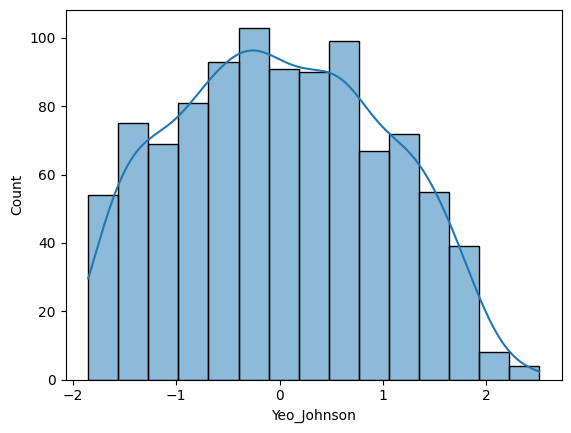

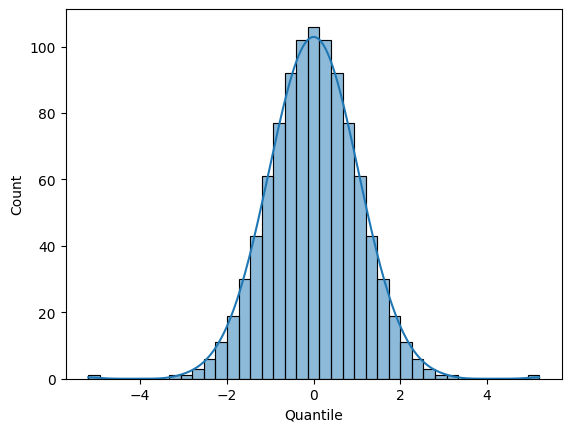

In [31]:
# Create histogram for all columns using sns,hist and kde = True use a for loop
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show()

In [32]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

pt_boxcox = PowerTransformer(method='box-cox', standardize=False)
pt_yeo_johnson = PowerTransformer(method='yeo-johnson', standardize=False)
qt_normal = QuantileTransformer(output_distribution='normal')

# boxxox ke liye data must be positive
df['Box_Cox'] = pt_boxcox.fit_transform(df[['values']]+ 1)
df['Yeo_Johnson'] = pt_yeo_johnson.fit_transform(df[['values']])
df['Quantile'] = qt_normal.fit_transform(df[['values']])

In [33]:
df.head()

,values,Box_Cox,Yeo_Johnson,Quantile
0,1.591749,0.787485,0.787485,0.162552
1,2.511862,0.980233,0.980233,0.587964
2,1.846446,0.849553,0.849553,0.286135
3,1.574402,0.782945,0.782945,0.157469
4,1.102097,0.639848,0.639848,-0.154930


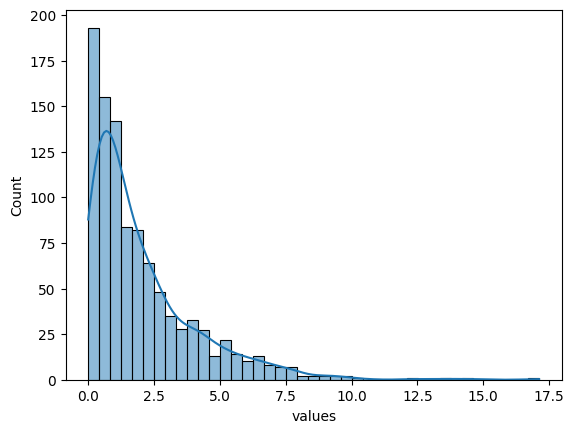

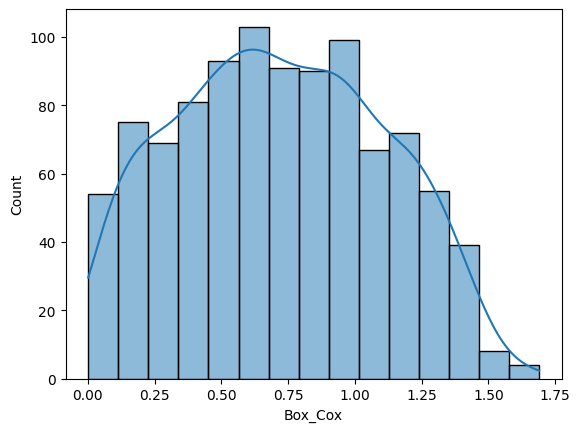

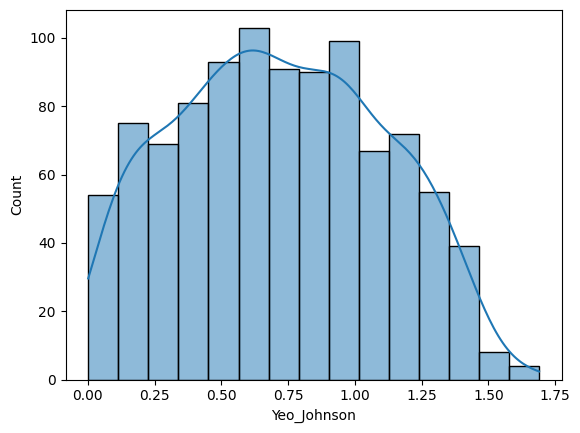

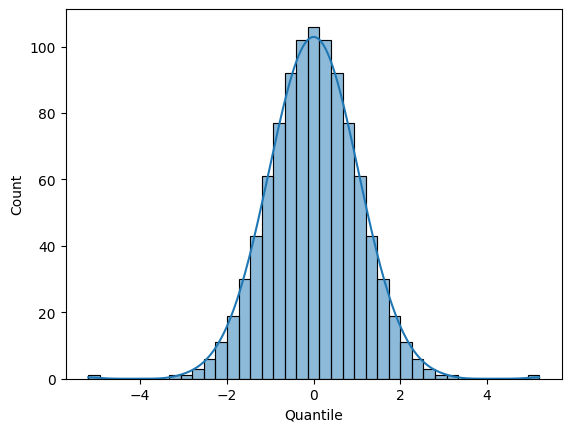

In [34]:
# Create histogram for all columns using sns,hist and kde = True use a for loop
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show()